# Build a `ws3` model from Woodstock-format text input files

`ws3` has built-in functions that can parse Woodstock-formatted model definition text files. Here we build an equivalent model to the direct-code model defined in `ws3_model_example`, but using Woodstock-foratted input files (as an alternative to the pure Python code implementation above).

The Woodstock-formatted input files are just flat text files, containing special Woodstock code.

Woodstock models are defined in terms of a number of _sections_. The sections can be defined in a single text file, or in separate text files. We will use separate text files for each section in this example.

Our model will include the following sections:
* `LANDSCAPE`
* `AREAS`
* `YIELD`
* `ACTIONS`
* `TRANSITIONS`

There are other possible sections that one can include in a Woodstock model, which will not include here. This is not intended to be a comprehensive overview of Woodstock-format model definition. Refer to the Woodstock technical documentation for the complete story.

The model input files for this example are located in `data/woodstock_model_files`.

Optionally, uninstall the `ws3` package and replace it with a pointer to _this local clone of the GitHub repository code_ (useful if you want ot tweak the source code for whatever reason). 

In [1]:
clobber_ws3 = True
if clobber_ws3:
    %pip uninstall -y ws3
    %pip install -e ..

Found existing installation: ws3 0.0.1.post3
Uninstalling ws3-0.0.1.post3:
  Successfully uninstalled ws3-0.0.1.post3
Note: you may need to restart the kernel to use updated packages.
Obtaining file:///media/data/project/gparadis/ws3
  Preparing metadata (setup.py) ... done
  Running setup.py develop for ws3
Note: you may need to restart the kernel to use updated packages.


## `LANDSCAPE` section

The `LANDSCAPE` section defines themes (i.e., state variables), theme basecodes (i.e., valid state variable values), and theme aggregates (i.e., groups of state variable values within a given theme, which can include aggregates with no [documented] limit on recursion depth).

The `LANDSCAPE` section for this example is defined in file `data/woodstock_model_files/tsa24_clipped.lan`.

In [2]:
!cat data/woodstock_model_files/tsa24_clipped.lan


*THEME Timber Supply Area (TSA)
tsa24_clipped

*THEME Timber Harvesting Land Base (THLB)
0
1

*THEME Analysis Unit (AU)
2402002
2401007
2402001
2401005
2402000
2403004
2403006
2401004
2401006
2402004
2402007
2403005
2401002
2403007
2403003
2401000
2402005
2402006
2401003
2403002
2402003
2403000
2401001
2403001

*THEME Leading tree species (CANFI species code)
304
100
1201
204
104

*THEME Yield curve ID
2402002
2401007
2422007
2402001
2401005
2422003
2402000
2403004
2423004
2403006
2421007
2423003
2401004
2401006
2402004
2421002
2422004
2423002
2422002
2402007
2403005
2401002
2403007
2423007
2403003
2401000
2402005
2402006
2401003
2423001
2403002
2402003
2422000
2403000
2401001
2423000
2403001


## `AREAS` section

The `AREAS` section defines the initial inventory, as area by development type and age. 

The `AREAS` section for this example is defined in file `data/woodstock_model_files/tsa24_clipped.are`.

In [3]:
!cat data/woodstock_model_files/tsa24_clipped.are


*A tsa24_clipped 0 2401000 100 2401000 85 15.182274886309896
*A tsa24_clipped 0 2401000 100 2401000 95 20.653788842921458
*A tsa24_clipped 0 2401000 100 2401000 105 1.109374490200082
*A tsa24_clipped 0 2401000 100 2401000 125 25.73174833461312
*A tsa24_clipped 0 2401000 100 2401000 135 62.02382759721078
*A tsa24_clipped 0 2401000 100 2401000 145 45.32228954967691
*A tsa24_clipped 0 2401000 100 2401000 155 3.052804424896181
*A tsa24_clipped 0 2402005 1201 2402005 85 1.812979326195168
*A tsa24_clipped 1 2401002 204 2401002 78 103.76740323520823
*A tsa24_clipped 1 2401002 204 2401002 80 4.173147018452507
*A tsa24_clipped 1 2401002 204 2401002 85 282.1296355046733
*A tsa24_clipped 1 2401002 204 2401002 91 73.1021561503533
*A tsa24_clipped 1 2401002 204 2401002 93 28.37956666951611
*A tsa24_clipped 1 2401002 204 2401002 95 94.94675966211176
*A tsa24_clipped 1 2401002 204 2401002 105 32.175418531537815
*A tsa24_clipped 1 2401002 204 2401002 113 4.184826329641321
*A tsa24_clipped 1 2401002 2

## `YIELDS` section

The `YIELDS` section defines yield curves and links these to development types.

The `YIELDS` section for this example is defined in file `data/woodstock_model_files/tsa24_clipped.yld`.

In [4]:
!cat data/woodstock_model_files/tsa24_clipped.yld


*Y ? ? 2401000 ? 2401000
s0100 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 2 2 2 3 3 3 4 4 4 5 5 6 6 7 7 8 8 9 9 10 10 11 12 12 13 14 14 15 16 16 17 18 19 19 20 21 22 23 23 24 25 26 27 28 29 30 31 32 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 100 101 101 102 103 104 105 106 107 108 109 109 110 111 112 113 114 114 115 116 117 117 118 119 120 121 121 122 123 123 124 125 125 126 127 127 128 129 129 130 130 131 132 132 133 133 134 134 135 135 136 136 137 137 138 138 139 139 140 140 140 141 141 142 142 143 143 143 144 144 144 145 145 145 145 146 146 146 147 147 147 147 147 148 148 148 148 149 149 149 149 149 149 149 150 150 150 150 150 150 150 150 150 150 151 151 151 151 151 151 151 151 151 151 151 151 151 151 150 150 150 150 150 150 150 150 150 150 150 150 149 149 149 149 149 149 149 148 148 148 148 148 148 147 147 147 147 147 146 146 1

## `ACTIONS` section

The `ACTIONS` section defines actions (i.e., treatments). 

The `ACTIONS` section for this example is defined in file `data/woodstock_model_files/tsa24_clipped.act`.

In [5]:
!cat data/woodstock_model_files/tsa24_clipped.act

ACTIONS
*ACTION harvest 0
*OPERABLE harvest
? 1 ? ? ? _AGE >= 40 AND _AGE <= 999


## `TRANSITIONS` section

The `TRANSITIONS` section defines transitions (i.e., change in theme-wise state variable values and age, induced by applying an action to an area of an age class within a development type).

We have AU-wise transitions to specific TIPSY curves after harvesting action in this model.

The `TRANSITIONS` section for this example is defined in file `data/woodstock_model_files/tsa24_clipped.trn`.

In [6]:
!cat data/woodstock_model_files/tsa24_clipped.trn


*CASE harvest
*SOURCE ? ? 2402000 ? ?
*TARGET ? ? ? ? 2422000 100
*SOURCE ? ? 2403000 ? ?
*TARGET ? ? ? ? 2423000 100
*SOURCE ? ? 2403001 ? ?
*TARGET ? ? ? ? 2423001 100
*SOURCE ? ? 2401002 ? ?
*TARGET ? ? ? ? 2421002 100
*SOURCE ? ? 2402002 ? ?
*TARGET ? ? ? ? 2422002 100
*SOURCE ? ? 2403002 ? ?
*TARGET ? ? ? ? 2423002 100
*SOURCE ? ? 2402003 ? ?
*TARGET ? ? ? ? 2422003 100
*SOURCE ? ? 2403003 ? ?
*TARGET ? ? ? ? 2423003 100
*SOURCE ? ? 2402004 ? ?
*TARGET ? ? ? ? 2422004 100
*SOURCE ? ? 2403004 ? ?
*TARGET ? ? ? ? 2423004 100
*SOURCE ? ? 2401007 ? ?
*TARGET ? ? ? ? 2421007 100
*SOURCE ? ? 2402007 ? ?
*TARGET ? ? ? ? 2422007 100
*SOURCE ? ? 2403007 ? ?
*TARGET ? ? ? ? 2423007 100


## Create and run `ForestModel` instance

The import files assume path and filename values based on `model_path` and `model_name` attributes set in the `ForestModel.__init__` method, combined with standard filename extensions for Woodstock model sections (i.e., `.lan`, `.are`, `.yld`, `.act`, `.trn`, etc.). See `ws3.forest` module source code for details.

In [7]:
import matplotlib.pyplot as plt
import pandas as pd
import geopandas as gpd
import ws3.forest, ws3.core

In [8]:
base_year = 2020
horizon = 10
period_length = 10
max_age = 1000
tvy_name = 'totvol'

In [9]:
fm = ws3.forest.ForestModel(model_name='tsa24_clipped',
                            model_path='data/woodstock_model_files',
                            base_year=base_year,
                            horizon=horizon,
                            period_length=period_length,
                            max_age=max_age)

In [10]:
fm.import_landscape_section()

In [11]:
fm.import_areas_section()

0

In [12]:
fm.import_yields_section()

In [13]:
fm.import_actions_section()

In [14]:
fm.import_transitions_section()

In [15]:
fm.reset()

## Run a priority queue harvest scheduling heuristic

The local `util` module defines a `schedule_harvest_areacontrol` function that implements a old-stand-first priority queue harvest scheduling heuristic. To make this demo as n00b friendly as possible, we set this up to be self-parametrising, i.e., the model automatically figures out an appropriate "periodic harvest area target" parameter value, by analysing the shape of its own yield curves to estimate a landscape-level optimal rotation age.

The local `util` module also defines a `compile_scenario` function that compiles some aggregate performance indicators from results of a harvesting and growth scenario, as well as a `plot_scenario` function that plots a grid of three bar charts so we can "see" the solution. 

Note that these are just local utility functions custom-coded to work with our test dataset an scenarios, that we defined in a side-car module for convenient re-use in other notebooks in this examples library to provide some visual feedback on the modelling process. 

In [16]:
from util import schedule_harvest_areacontrol
from util import compile_scenario
from util import plot_scenario

In [17]:
verbose = False # flip to True if you want the harvest scheduler to get _really_ chatty while it works
sch = schedule_harvest_areacontrol(fm, verbose=verbose)

(<Figure size 1200x400 with 3 Axes>,
 array([<Axes: title={'center': 'Harvested area (ha)'}>,
        <Axes: title={'center': 'Harvested volume (m3)'}>,
        <Axes: title={'center': 'Growing Stock (m3)'}>], dtype=object))

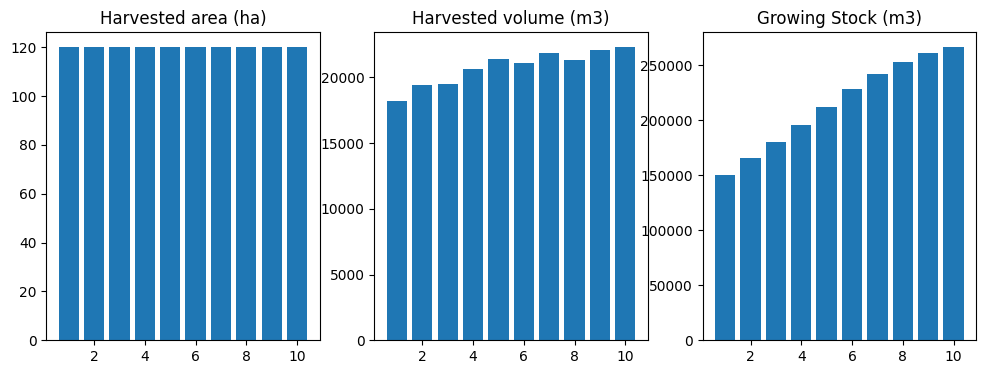

In [18]:
plot_scenario(compile_scenario(fm))

Ta da!